<a href="https://colab.research.google.com/github/mangalm96/explainablenlp-info259/blob/main/interpret_shap_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [42]:
import json
import pandas as pd
import numpy as np
import seaborn as sns

## make function 

In [6]:
# open file and import to df
def generate_shap_df(filepath):
  with open(filepath) as f:
    lines = f.readlines()
  shap_df  = pd.DataFrame()
  for line in lines:
    if line != '':
      line_data = json.loads(line)
      line_data_df = pd.DataFrame.from_dict(line_data["tokens"])
      if len(shap_df) == 0:
        shap_df = line_data_df
      else:
        shap_df = shap_df.append(line_data_df)

  return shap_df


In [7]:
# CI_ESRX_target = "/content/gdrive/MyDrive/NLP Stance Detection/tWT_WT/saves/twtwt_CVS_AET_notarget/model_output_shap"
# CI_ESRX_notarget = "/content/gdrive/MyDrive/NLP Stance Detection/Code_Kaushal/saves/wtwt_CI_ESRX_notarget/model_output_shap"


def get_scores(output_path):

  data_import = generate_shap_df(output_path)

  # convert to string (bcz presently showing up as a list)
  data_import['token'] = data_import['token'].astype(str)

  # remove rows from df with the selected tokens 
  removed_tokens = ["['Cig@@']"	, "['na']"  ,"['Ex@@']",		"['pres@@']",		"['s_@@']",		"['Scri@@']",	"['pts']"]
  print("before filtering:",len(data_import))
  data_import_filt = data_import[~(data_import['token'] .isin(removed_tokens))]
  print("after filtering:",len(data_import_filt))

  # rename cols
  data_import_filt = data_import_filt.rename(columns = {"0":"comment","1":"unrelated","2":"support","3":"refute"})

  # group by token and sum for each column
  groupby_df = data_import_filt.groupby('token').agg('mean')

  return data_import_filt,groupby_df


## twt-wt CI ESRX target

In [8]:
output_path = "/content/gdrive/MyDrive/NLP Stance Detection/tWT_WT/saves/twtwt_CI_ESRX_target/model_output_shap"
ungrouped_df, groupby_df= get_scores(output_path)

before filtering: 156512
after filtering: 156511


In [6]:
ungrouped_df[:30]

,token,comment,unrelated,support,refute
0,['[CLS]'],0.009991,-0.132111,0.132035,0.123675
1,['[UNK]'],-0.022080,-0.053643,0.080389,-0.030907
2,['s'],0.108354,-0.046067,0.058843,-0.051412
3,['purchase'],-0.243573,0.190837,0.230178,-0.116394
4,['of'],-0.227556,0.013288,0.500724,0.100294
5,['Express'],-1.051011,1.933852,-2.248916,-0.290772
6,['[UNK]'],-0.152465,0.308127,0.040892,0.032829
7,['is'],-0.011388,-0.167028,0.388974,-0.005512
8,['on'],-0.115168,-0.017790,0.198406,-0.031187
9,['track'],-0.079489,-0.084676,0.348316,-0.041566


In [9]:
# top 10 - support stance 

groupby_df.sort_values("support",ascending=False)[['support']].head(10)

,support
token,
['Forward'],0.943213
['wrapping'],0.920116
['Block'],0.887537
['Solid'],0.873881
['Marriage'],0.856949
['approved'],0.797272
['Large'],0.770867
['passed'],0.763495
['furious'],0.761476


In [10]:
# top 10 - refute stance 
groupby_df.sort_values("refute",ascending=False)[['refute']].head(20)

,refute
token,
['squash'],2.135632
['warning'],1.664823
['foil'],1.459582
['rejected'],1.427608
['Block'],1.326470
['block'],1.318380
['muted'],1.315647
['tough'],1.241860
['threaten'],1.218785


### plot

In [113]:
def ABS_SHAP(groupby_df, stance, num_of_top_words, dataset="tWT-WT"):

  from matplotlib import rcParams

  # figure size in inches
  # rcParams['figure.figsize'] = 5,6

  shap_v = pd.DataFrame(groupby_df)
  stance_df = shap_v[stance]
  stance_df = stance_df.reset_index()
  # stance_df_plot = pd.DataFrame({"token": stance_df["token"], "SHAP_abs": np.abs(stance_df[stance]), "SHAP": stance_df[stance]})
  stance_df_plot = pd.DataFrame({"token": stance_df["token"], "SHAP Value": stance_df[stance], "SHAP": stance_df[stance]})

  stance_df_plot = stance_df_plot.sort_values(by="SHAP Value", ascending=False)
  stance_df_plot["sign"] = np.where(stance_df_plot["SHAP"] > 0, "red", "blue")
  stance_df_plot = stance_df_plot.head(num_of_top_words)
  # ax = stance_df_plot.plot.barh(x="token", y="SHAP Value", color = stance_df_plot["sign"], figsize=(5,6))
  ax = stance_df_plot.plot.barh(x="token", y="SHAP Value", color = 'darkblue', figsize=(5,6))



  # ax = sns.barplot(y="token", x="SHAP Value", data=stance_df_plot,color = 'darkblue',orient="h")


  ax.set_xlabel(f"{dataset}: SHAP Value for stance")

 

  plt_name = dataset + "_" + stance + ".png" 
  ax.figure.savefig(plt_name)
  

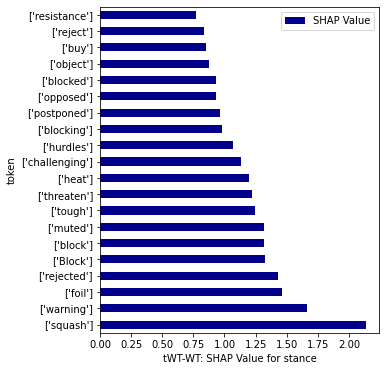

In [114]:
ABS_SHAP(groupby_df, "refute", 20)



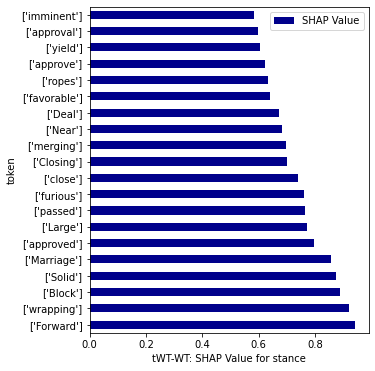

In [116]:
ABS_SHAP(groupby_df, "support", 20)


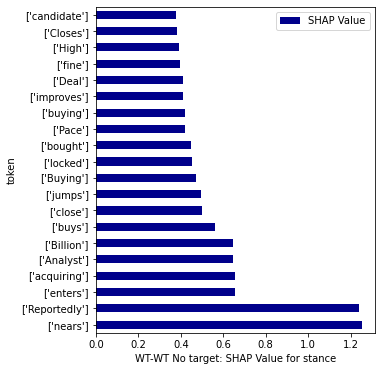

In [115]:
ABS_SHAP(groupby_df_wtwt_notgt, "support", 20,"WT-WT No target")


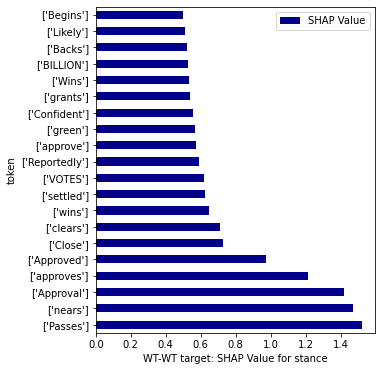

In [117]:
ABS_SHAP(groupby_df_wtwt, "support", 20,"WT-WT target")


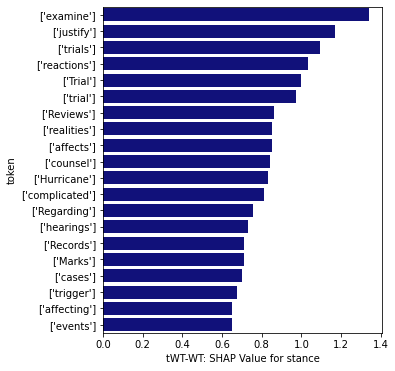

In [80]:
ABS_SHAP(groupby_df, "comment", 20)


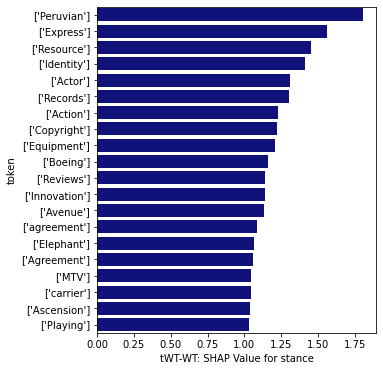

In [81]:
ABS_SHAP(groupby_df, "unrelated", 20)


## CI ESRX WT WT no target

In [75]:
## wt wt 

CI_ESRX_notarget = "/content/gdrive/MyDrive/NLP Stance Detection/Code_Kaushal/saves/wtwt_CI_ESRX_notarget/model_output_shap"
# output_path = "/content/gdrive/MyDrive/NLP Stance Detection/tWT_WT/saves/twtwt_CI_ESRX_target/model_output_shap"
ungrouped_df, groupby_df_wtwt_notgt= get_scores(CI_ESRX_notarget)

before filtering: 8111
after filtering: 8111


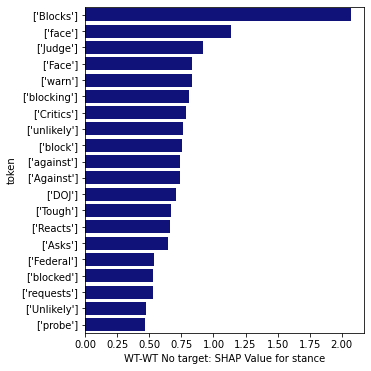

In [82]:
ABS_SHAP(groupby_df_wtwt_notgt, "refute", 20,"WT-WT No target")


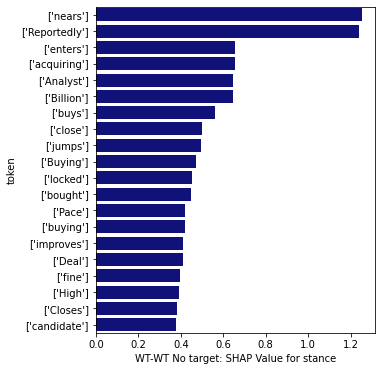

In [83]:
ABS_SHAP(groupby_df_wtwt_notgt, "support", 20,"WT-WT No target")


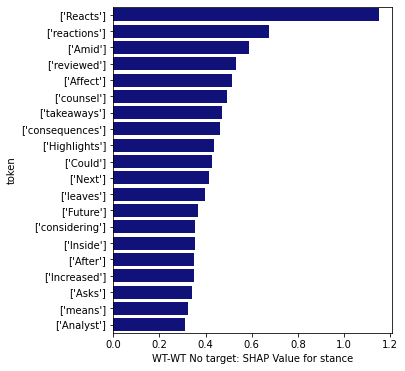

In [84]:
ABS_SHAP(groupby_df_wtwt_notgt, "comment", 20,"WT-WT No target")


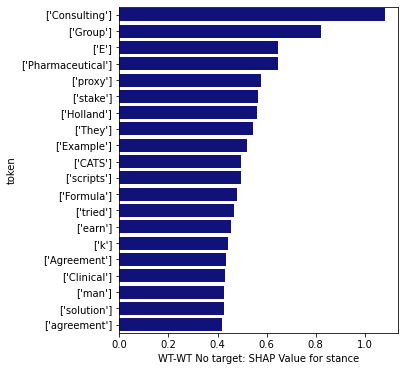

In [85]:
ABS_SHAP(groupby_df_wtwt_notgt, "unrelated", 20,"WT-WT No target")


In [6]:
# top 10 - support stance 
groupby_df_wtwt_notgt.sort_values("support",ascending=False)[['support']].head(20)

,support
token,
['nears'],1.251128
['Reportedly'],1.239876
['enters'],0.657574
['acquiring'],0.654052
['Analyst'],0.646148
['Billion'],0.645379
['buys'],0.561839
['close'],0.502102
['jumps'],0.496965


In [7]:
# top 10 - refute stance 
groupby_df.sort_values("refute",ascending=False)[['refute']].head(20)

,refute
token,
['Blocks'],2.070017
['face'],1.137720
['Judge'],0.917574
['Face'],0.832282
['warn'],0.830341
['blocking'],0.810116
['Critics'],0.785159
['unlikely'],0.760422
['block'],0.754797


## CI ESRX target

In [70]:
## wt wt 

CI_ESRX_target_WTWT = "/content/gdrive/MyDrive/NLP Stance Detection/xai_atanasova/WTWT/CI_ESRX_target/model_output_shap"
# output_path = "/content/gdrive/MyDrive/NLP Stance Detection/tWT_WT/saves/twtwt_CI_ESRX_target/model_output_shap"
ungrouped_df, groupby_df_wtwt= get_scores(CI_ESRX_target_WTWT)

before filtering: 76882
after filtering: 61300


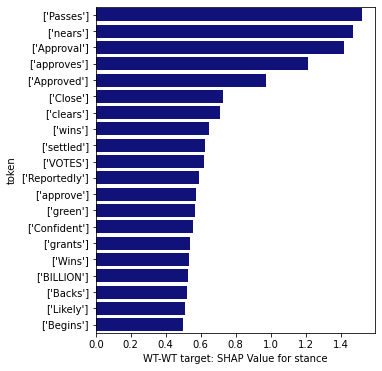

In [86]:
ABS_SHAP(groupby_df_wtwt, "support", 20,"WT-WT target")


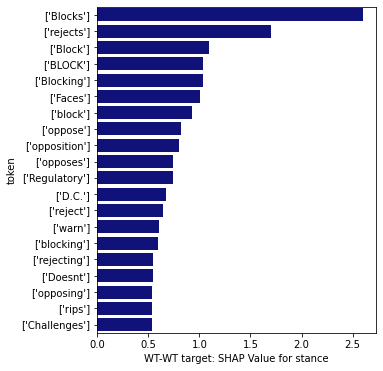

In [87]:
ABS_SHAP(groupby_df_wtwt, "refute", 20,"WT-WT target")


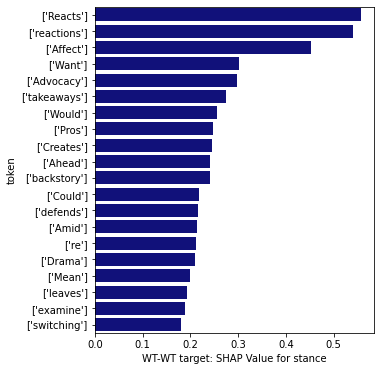

In [88]:
ABS_SHAP(groupby_df_wtwt, "comment", 20,"WT-WT target")


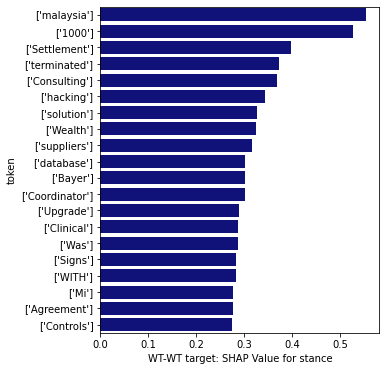

In [89]:
ABS_SHAP(groupby_df_wtwt, "unrelated", 20,"WT-WT target")


In [ ]:
# top 10 - comment stance 
groupby_df.sort_values("comment",ascending=False)[['comment']].head(10)

,comment
token,
['Reacts'],0.556610
['reactions'],0.540658
['Affect'],0.452303
['Want'],0.301683
['Advocacy'],0.297985
['takeaways'],0.275026
['Would'],0.255229
['Pros'],0.246959
['Creates'],0.245186


In [ ]:
# top 10 - support stance 
groupby_df.sort_values("support",ascending=False)[['support']].head(20)

,support
token,
['Passes'],1.520085
['nears'],1.469554
['Approval'],1.422274
['approves'],1.214439
['Approved'],0.972900
['Close'],0.728120
['clears'],0.709736
['wins'],0.647626
['settled'],0.625990


In [ ]:
# top 10 - refute stance 
groupby_df.sort_values("refute",ascending=False)[['refute']].head(20)

,refute
token,
['Blocks'],2.600089
['rejects'],1.698239
['Block'],1.098688
['BLOCK'],1.033419
['Blocking'],1.032048
['Faces'],1.004886
['block'],0.931564
['oppose'],0.817602
['opposition'],0.801427


In [ ]:
# top 10 - unrelated stance 
groupby_df.sort_values("unrelated",ascending=False)[['unrelated']].head(10)

,unrelated
token,
['malaysia'],0.554552
['1000'],0.527161
['Settlement'],0.398674
['terminated'],0.372665
['Consulting'],0.367472
['hacking'],0.343690
['solution'],0.326888
['Wealth'],0.324397
['suppliers'],0.316088


## import predictions

In [ ]:
predictions_path = "/content/gdrive/MyDrive/NLP Stance Detection/Code_Kaushal/saves/wtwt_CI_ESRX_target/model.predictions"

with open(predictions_path, 'r') as f:
  data = json.load(f)


In [ ]:
data['class'][:4]

[2, 2, 0, 0]

In [ ]:
# import predictions
predictions_path = "/content/gdrive/MyDrive/NLP Stance Detection/Code_Kaushal/saves/wtwt_CI_ESRX_target/model.predictions"

def generate_shap_df(filepath):
  line_data = json.loads(line)
  with open(filepath) as f:
    data = json.load(f)
  print(data)

  # shap_df  = pd.DataFrame()
  # for line in lines:
  #   print(line)
  #   # dictionary = dict()
  #   if line != '':
  #     line_data = json.loads(line)
  #     # print(line_data.keys())
  #     print(line_data)
  #     line_data_df = pd.DataFrame.from_dict(line_data["tokens"])
  #     # print(line_data_df)
  #     if len(shap_df) == 0:
  #       shap_df = line_data_df
  #     else:
  #       shap_df.append(line_data_df)
  #   # shap_df = shap_df.sort_values("token")
  # return shap_df